<a href="https://colab.research.google.com/github/DimOriCoding/Artificial_Intelligence_II/blob/main/Artificial_Intelligence_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import re

In [ ]:
df = pd.read_csv("imdb-reviews.csv", sep = '\t')
test_df = None

print(df)

df.describe()

                                                    url  rating  \
0      http://www.imdb.com/title/tt0120623/usercomments    10.0   
1      http://www.imdb.com/title/tt0043117/usercomments     9.0   
2      http://www.imdb.com/title/tt0043117/usercomments    10.0   
3      http://www.imdb.com/title/tt0835204/usercomments     4.0   
4      http://www.imdb.com/title/tt0499603/usercomments    10.0   
...                                                 ...     ...   
45003  http://www.imdb.com/title/tt0449000/usercomments     1.0   
45004  http://www.imdb.com/title/tt0109382/usercomments     1.0   
45005  http://www.imdb.com/title/tt0375560/usercomments     1.0   
45006  http://www.imdb.com/title/tt0165107/usercomments     1.0   
45007  http://www.imdb.com/title/tt0041513/usercomments    10.0   

                                                  review  
0      I thought this was a quiet good movie. It was ...  
1      Wagon Master is a very unique film amongst Joh...  
2      This film h

,rating
count,45008.000000
mean,5.481914
std,3.494293
min,1.000000
25%,2.000000
50%,7.000000
75%,9.000000
max,10.000000


In [ ]:
documents = []

from nltk.corpus import stopwords
row_count_train = sum(1 for rows in df["url"])

for i in range(row_count_train):
    # Remove all the special characters
    document1 = re.sub(r'\W', ' ', str(df["review"][i]))
    # remove all single characters
    document1 = re.sub(r'\s+[a-zA-Z]\s+', ' ', document1)
    # Remove single characters from the start
    document1 = re.sub(r'\^[a-zA-Z]\s+', ' ', document1)
    # Substituting multiple spaces with single space
    document1 = re.sub(r'\s+', ' ', document1, flags=re.I)
    # Removing prefixed 'b'
    document1 = re.sub(r'^b\s+', '', document1)
    # Converting to Lowercase
    document1 = document1.lower()
    documents.append(document1)
    print("Reviews_train",i)


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Reviews_train 40008
Reviews_train 40009
Reviews_train 40010
Reviews_train 40011
Reviews_train 40012
Reviews_train 40013
Reviews_train 40014
Reviews_train 40015
Reviews_train 40016
Reviews_train 40017
Reviews_train 40018
Reviews_train 40019
Reviews_train 40020
Reviews_train 40021
Reviews_train 40022
Reviews_train 40023
Reviews_train 40024
Reviews_train 40025
Reviews_train 40026
Reviews_train 40027
Reviews_train 40028
Reviews_train 40029
Reviews_train 40030
Reviews_train 40031
Reviews_train 40032
Reviews_train 40033
Reviews_train 40034
Reviews_train 40035
Reviews_train 40036
Reviews_train 40037
Reviews_train 40038
Reviews_train 40039
Reviews_train 40040
Reviews_train 40041
Reviews_train 40042
Reviews_train 40043
Reviews_train 40044
Reviews_train 40045
Reviews_train 40046
Reviews_train 40047
Reviews_train 40048
Reviews_train 40049
Reviews_train 40050
Reviews_train 40051
Reviews_train 40052
Reviews_train 40053
Reviews_train 40054
Revie

In [ ]:
Y = df[['rating']] # [[ ]] used to keep the label

# classify the reviews as negative and positive reviews
Y.loc[Y['rating'] <= 4.0, 'rating'] = 0
Y.loc[Y['rating'] >= 7.0, 'rating'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
nltk.download('stopwords')
vectorizer = CountVectorizer(max_features=1000, min_df=0.01, max_df=0.7,stop_words=stopwords.words('english'))

X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()
print(vectorizer.get_feature_names_out())
print(X)
Y = np.array(Y)






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['10' '15' '20' '30' '80' '90' 'able' 'absolutely' 'across' 'act' 'acted'
 'acting' 'action' 'actor' 'actors' 'actress' 'actual' 'actually' 'add'
 'admit' 'adventure' 'age' 'ago' 'agree' 'air' 'alien' 'alive' 'almost'
 'alone' 'along' 'already' 'also' 'although' 'always' 'amazing' 'america'
 'american' 'among' 'amount' 'animation' 'annoying' 'another' 'anti'
 'anyone' 'anything' 'anyway' 'apart' 'apparently' 'appear' 'appears'
 'appreciate' 'around' 'art' 'ask' 'atmosphere' 'attempt' 'attempts'
 'attention' 'audience' 'average' 'avoid' 'away' 'awesome' 'awful' 'baby'
 'back' 'background' 'bad' 'badly' 'band' 'based' 'basic' 'basically'
 'battle' 'beautiful' 'beauty' 'became' 'become' 'becomes' 'begin'
 'beginning' 'begins' 'behind' 'believable' 'believe' 'ben' 'best'
 'better' 'beyond' 'big' 'biggest' 'bill' 'bit' 'black' 'blood' 'body'
 'book' 'bored' 'boring' 'box' 'boy' 'boys' 'br' 'brain' 'break'
 'brilliant' 'bring' 'brings' 'british' 'brother' 'brothers' 'brought'
 'budget' 'bunc

In [ ]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
classifier = LogisticRegression(max_iter = 500, class_weight = 'balanced',tol = 1e-4, C = 0.8)


In [ ]:

# Predict-cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state = 220, shuffle = True)
print(kf.get_n_splits(X))


for train_index, val_index in kf.split(X):
    print("TRAIN:", train_index, "VALIDATE:", val_index)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]

    classifier.fit(X_train, np.ravel(Y_train))
    predictions_train = classifier.predict(X_train)
    predictions_val = classifier.predict(X_val)

    print(predictions_val)
    print(np.ravel(Y_val))

# F-Score

    f1_train = f1_score(Y_train, predictions_train)
    f1_val = f1_score(Y_val, predictions_val)



# Precision

    precision_train = precision_score(Y_train, predictions_train)
    precision_val = precision_score(Y_val, predictions_val)

#Recall

    recall_train = recall_score(Y_train, predictions_train)
    recall_val = recall_score(Y_val, predictions_val)
#cross entropy loss
    logloss_train = log_loss(Y_train, predictions_train)
    logloss_val = log_loss(Y_val, predictions_val)

    print("F1 Score (train):", f1_train)
    print("F1 Score (validation):", f1_val)
    print("Precision Score (train):", precision_train)
    print("Precision Score (validation):", precision_val)
    print("Recall Score (train):", recall_train)
    print("Recall Score (validation):",recall_val)
    print("log_loss (train):", logloss_train)
    print("log_loss (validation):", logloss_val)

5
TRAIN: [    1     2     3 ... 45005 45006 45007] VALIDATE: [    0     7    17 ... 44986 44998 45001]
[1. 1. 1. ... 0. 1. 0.]
[1. 1. 1. ... 0. 1. 0.]
F1 Score (train): 0.8785313839727382
F1 Score (validation): 0.8664101154480484
Precision Score (train): 0.8687900858788998
Precision Score (validation): 0.8608258684727987
Recall Score (train): 0.8884936075597554
Recall Score (validation): 0.8720672864099159
log_loss (train): 4.239941173518351
log_loss (validation): 4.661755461384083
TRAIN: [    0     1     2 ... 45005 45006 45007] VALIDATE: [    8    11    26 ... 45000 45003 45004]
[1. 0. 1. ... 1. 0. 0.]
[1. 0. 1. ... 1. 0. 0.]
F1 Score (train): 0.8759192185270551
F1 Score (validation): 0.8763721033373989
Precision Score (train): 0.8677757842657533
Precision Score (validation): 0.866286716352477
Recall Score (train): 0.8842169408897014
Recall Score (validation): 0.8866950863809737
log_loss (train): 4.337785132442826
log_loss (validation): 4.278074142941328
TRAIN: [    0     1     2 ...

TRAIN: [    1     2     3 ... 45005 45006 45007] VALIDATE: [    0     7    17 ... 44986 44998 45001]
F1 Score Train: 1.0
F1 Score Validation: 0.5584380850494786
precision Score Train: 1.0
precision Score Validation: 0.6863905325443787
recall Score Train: 1.0
recall Score Validation: 0.47069431920649235
log loss Train: 9.992007221626415e-16
log loss Validation: 12.670570211303575
F1 Score Train: 0.8892517006802722
F1 Score Validation: 0.8522123893805309
precision Score Train: 0.8737967914438503
precision Score Validation: 0.8366637706342311
recall Score Train: 0.9052631578947369
recall Score Validation: 0.8683498647430117
log loss Train: 3.866191060979696
log loss Validation: 5.126586663800486
F1 Score Train: 0.8831846259437199
F1 Score Validation: 0.8522009091917063
precision Score Train: 0.8732356134636265
precision Score Validation: 0.8385337115426577
recall Score Train: 0.8933629547347959
recall Score Validation: 0.8663210099188458
log loss Train: 4.0614718977572055
log loss Validat

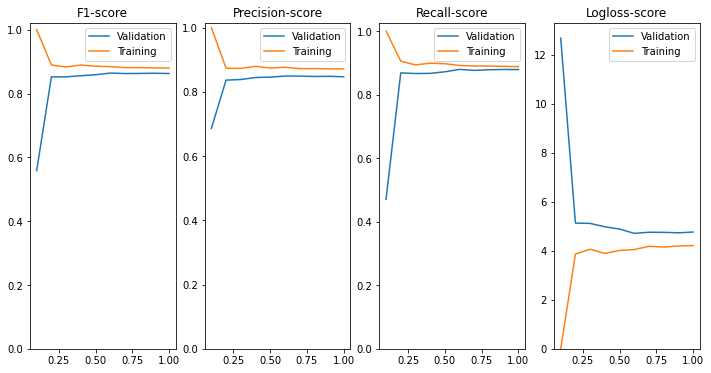

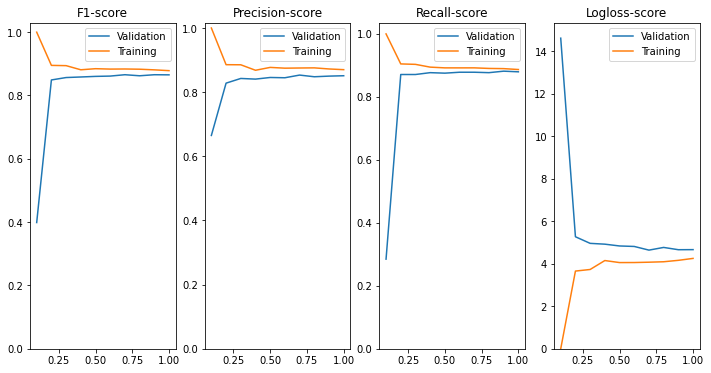

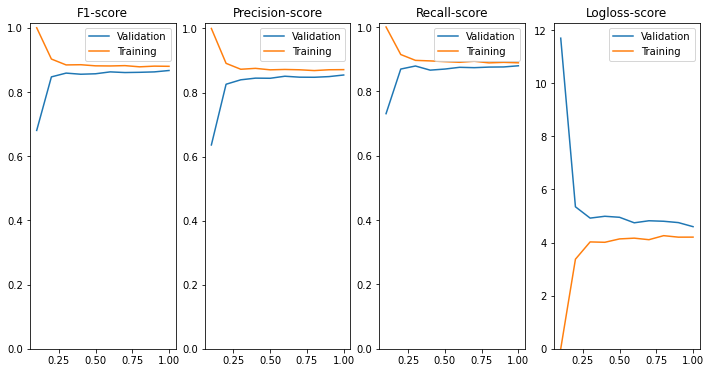

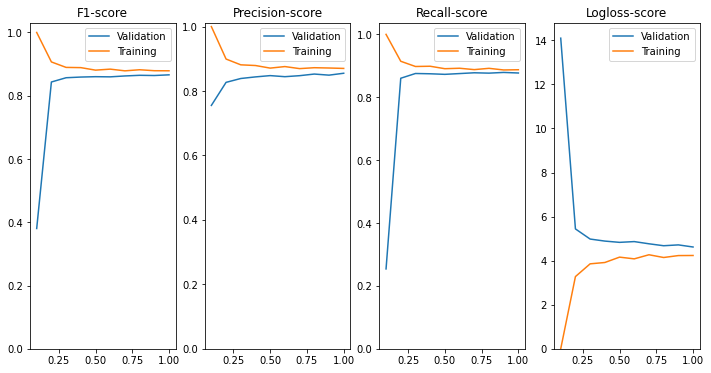

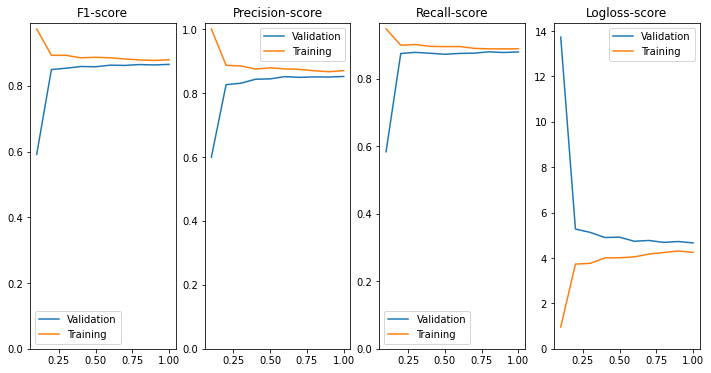

In [ ]:
for train_index, val_index in kf.split(X):
    print("TRAIN:", train_index, "VALIDATE:", val_index)
    plt.subplots(1,4,figsize = (12,6))
    #List of all values that refer to f1-score,precision,cross entropy loss and recall for each k fold
      list_f1 = []
      list_f1_train = []
      list_precision = []
      list_precision_train = []
      list_recall = []
      list_recall_train = []
      list_crossentropyloss = []
      list_crossentropyloss_train = []
      list_sample_size = []

    for times in range(10):
     # training
     #
      X2, X2_unused, y2, y2_unused = train_test_split(X_train, Y_train, test_size=1 - (times * 0.1 + 0.001))

      classifier.fit(X2, np.ravel(y2))

      results_train = classifier.predict(X2)

     # validation
     #
      results = classifier.predict(X_val)



     # f1-score
     #
      f1_train = f1_score(y2, results_train)
      print("F1 Score Train: " + str(f1_train))

      f1 = f1_score(Y_val, results)
      print("F1 Score Validation: " + str(f1))

     # precision-score
     #
      precision_train = precision_score(y2, results_train)
      print("precision Score Train: " + str(precision_train))

      precision = precision_score(Y_val, results)
      print("precision Score Validation: " + str(precision))

     # recall-score
     #
      recall_train = recall_score(y2, results_train)
      print("recall Score Train: " + str(recall_train))

      recall = recall_score(Y_val, results)
      print("recall Score Validation: " + str(recall))

     # cross entropy loss
      Logloss_train = log_loss(y2, results_train)
      print("log loss Train: " + str(Logloss_train))

      Logloss = log_loss(Y_val, results)
      print("log loss Validation: " + str(Logloss))


      list_f1.append(f1)
      list_f1_train.append(f1_train)
      list_precision.append(precision)
      list_precision_train.append(precision_train)
      list_recall.append(recall)
      list_recall_train.append(recall_train)
      list_crossentropyloss.append(Logloss)
      list_crossentropyloss_train.append(Logloss_train)
      list_sample_size.append((times * 0.1 + 0.1))

# print(plot_data)


    plt.subplot(1,4,1)
    plt.plot(list_sample_size, list_f1)
    plt.plot(list_sample_size, list_f1_train)
    plt.ylim(ymin=0)

    plt.legend(["Validation", "Training"])
    plt.title("F1-score")

    plt.subplot(1,4,2)

    plt.plot(list_sample_size, list_precision)
    plt.plot(list_sample_size, list_precision_train)
    plt.ylim(ymin=0)

    plt.legend(["Validation", "Training"])
    plt.title("Precision-score")

    plt.subplot(1,4,3)

    plt.plot(list_sample_size, list_recall)
    plt.plot(list_sample_size, list_recall_train)
    plt.ylim(ymin=0)
    plt.legend(["Validation", "Training"])
    plt.title("Recall-score")

    plt.subplot(1,4,4)

    plt.plot(list_sample_size, list_crossentropyloss)
    plt.plot(list_sample_size, list_crossentropyloss_train)
    plt.ylim(ymin=0)
    plt.legend(["Validation", "Training"])
    plt.title("Logloss-score")



In [ ]:
#test_df = df.log[0:10000]
if test_df is not None:
 documents_test = []
 row_count_test = sum(1 for rows in test_df["url"])
 print(row_count_test)
 for i in range(row_count_test):
    # Remove all the special characters
    document1 = re.sub(r'\W', ' ', str(test_df["review"][i]))
    # remove all single characters
    document1 = re.sub(r'\s+[a-zA-Z]\s+', ' ', document1)
    # Remove single characters from the start
    document1 = re.sub(r'\^[a-zA-Z]\s+', ' ', document1)
    # Substituting multiple spaces with single space
    document1 = re.sub(r'\s+', ' ', document1, flags=re.I)
    # Removing prefixed 'b'
    document1 = re.sub(r'^b\s+', '', document1)
    # Converting to Lowercase
    document1 = document1.lower()
    documents_test.append(document1)
    print("Reviews_test",i)

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
Reviews_test 1001
Reviews_test 1002
Reviews_test 1003
Reviews_test 1004
Reviews_test 1005
Reviews_test 1006
Reviews_test 1007
Reviews_test 1008
Reviews_test 1009
Reviews_test 1010
Reviews_test 1011
Reviews_test 1012
Reviews_test 1013
Reviews_test 1014
Reviews_test 1015
Reviews_test 1016
Reviews_test 1017
Reviews_test 1018
Reviews_test 1019
Reviews_test 1020
Reviews_test 1021
Reviews_test 1022
Reviews_test 1023
Reviews_test 1024
Reviews_test 1025
Reviews_test 1026
Reviews_test 1027
Reviews_test 1028
Reviews_test 1029
Reviews_test 1030
Reviews_test 1031
Reviews_test 1032
Reviews_test 1033
Reviews_test 1034
Reviews_test 1035
Reviews_test 1036
Reviews_test 1037
Reviews_test 1038
Reviews_test 1039
Reviews_test 1040
Reviews_test 1041
Reviews_test 1042
Reviews_test 1043
Reviews_test 1044
Reviews_test 1045
Reviews_test 1046
Reviews_test 1047
Reviews_test 1048
Reviews_test 1049
Reviews_test 1050
Reviews_test 1051
Reviews_test 1052
Reviews_t

In [ ]:

if test_df is not None:
   X_val = vectorizer.transform(documents_test)

   X_val = tfidfconverter.transform(X_val).toarray()
   print(vectorizer.get_feature_names_out())
   print(X_val)

   Y_test = test_df[['rating']] # [[ ]] used to keep the label

# classify the reviews as negative and positive reviews
   Y_test.loc[Y_test['rating'] <= 4.0, 'rating'] = 0
   Y_test.loc[Y_test['rating'] >= 7.0, 'rating'] = 1

   Y_val = np.array(Y_test)
   predictions = classifier.predict(X_val)
   # F-Score
   f1 = f1_score(Y_val, predictions)
   print("F1 Score (validation):", f1)

# Precision
   precision = precision_score(Y_val, predictions)
   print("Precision Score (validation):", precision)

#Recall
   recall_val = recall_score(Y_val, predictions)
   print("Recall Score (validation):", recall)

#Cross entropy loss
   logloss_val = log_loss(Y_val, predictions)
   print("Cross entropy loss:", logloss_val)


['10' '15' '20' '30' '80' '90' 'able' 'absolutely' 'across' 'act' 'acted'
 'acting' 'action' 'actor' 'actors' 'actress' 'actual' 'actually' 'add'
 'admit' 'adventure' 'age' 'ago' 'agree' 'air' 'alien' 'alive' 'almost'
 'alone' 'along' 'already' 'also' 'although' 'always' 'amazing' 'america'
 'american' 'among' 'amount' 'animation' 'annoying' 'another' 'anti'
 'anyone' 'anything' 'anyway' 'apart' 'apparently' 'appear' 'appears'
 'appreciate' 'around' 'art' 'ask' 'atmosphere' 'attempt' 'attempts'
 'attention' 'audience' 'average' 'avoid' 'away' 'awesome' 'awful' 'baby'
 'back' 'background' 'bad' 'badly' 'band' 'based' 'basic' 'basically'
 'battle' 'beautiful' 'beauty' 'became' 'become' 'becomes' 'begin'
 'beginning' 'begins' 'behind' 'believable' 'believe' 'ben' 'best'
 'better' 'beyond' 'big' 'biggest' 'bill' 'bit' 'black' 'blood' 'body'
 'book' 'bored' 'boring' 'box' 'boy' 'boys' 'br' 'brain' 'break'
 'brilliant' 'bring' 'brings' 'british' 'brother' 'brothers' 'brought'
 'budget' 'bunc

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
